# Plot neural network weights and bias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
# load and display mnist dataset information (optional)
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape) # (60000, 28, 28)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

(60000, 28, 28)
60000 train samples
10000 test samples
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# create model

first_layer_size=3
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 2355      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 12        
Total params: 2,408
Trainable params: 2,408
Non-trainable params: 0
_________________________________________________________________


In [7]:
# dislay weight and bias info

w = []
count=1
for layer in model.layers: # iterate through each layer
    weights = layer.get_weights()
    w.append(weights) # add weights of the layer to list
    print("Layer", count, "name", layer)
    count+=1

# each 'w' will return two values (two different list), containing weight and bias for particular layer

count=1
for item in w[3]: # w[3] will return the weights and bias of the last layers, index can be changed
    print("\n List ", count, "contains: \n", item)
    print("\n List ", count, "length: ",len(item))
    count+=1

# get weight and bias matrix of the last layer directly
weigh=layer.get_weights()[0] # will return weights
bias=layer.get_weights()[1] # will retun bias
print("\nWeight= ",weigh)
print("Bias= ",bias)

Layer 1 name <keras.layers.core.Dense object at 0x000002D012069DD8>
Layer 2 name <keras.layers.core.Dense object at 0x000002D012069E80>
Layer 3 name <keras.layers.core.Dense object at 0x000002D0120810B8>
Layer 4 name <keras.layers.core.Dense object at 0x000002D0140ED1D0>

 List  1 contains: 
 [[ 0.41765296  0.0636754 ]
 [-0.79129386  0.80411756]
 [-0.7937999   0.00342268]
 [ 0.27624607  0.27067816]
 [ 0.34371614  0.26782954]]

 List  1 length:  5

 List  2 contains: 
 [0. 0.]

 List  2 length:  2

Weight=  [[ 0.41765296  0.0636754 ]
 [-0.79129386  0.80411756]
 [-0.7937999   0.00342268]
 [ 0.27624607  0.27067816]
 [ 0.34371614  0.26782954]]
Bias=  [0. 0.]



 Shape of First Layer (784, 32)
Visualization of First Layer


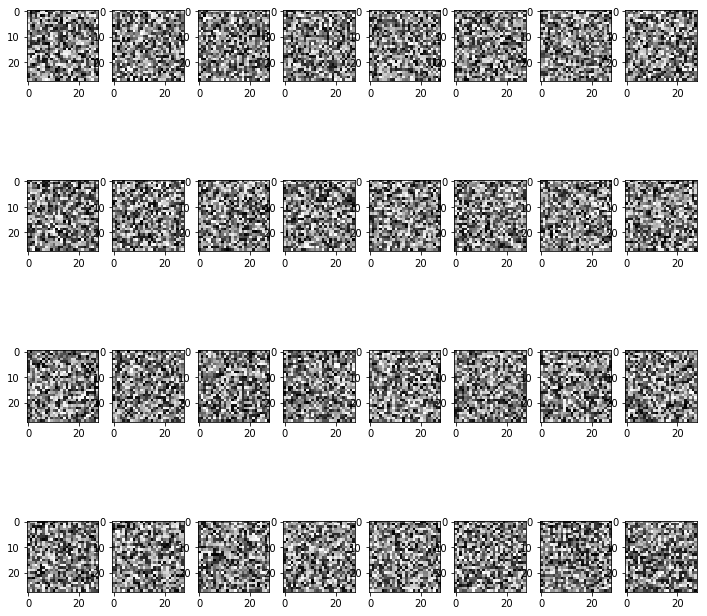

In [8]:
# plot first layer weights

layer1 = np.array(w[0][0])
print("\n Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8

rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()